#### Logistic Regression

###### Importing the Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Dataset

In [44]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


##### Exploratory Data Analysis and Visualization

In [46]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

In [47]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


<Axes: xlabel='test_result', ylabel='age'>

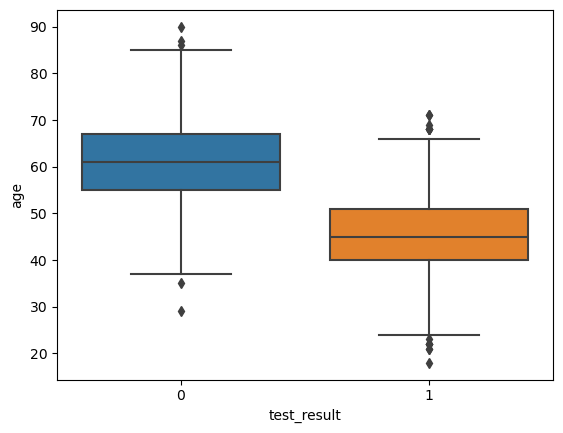

In [48]:
sns.boxplot(x='test_result',y='age',data = df)

<Axes: xlabel='test_result', ylabel='physical_score'>

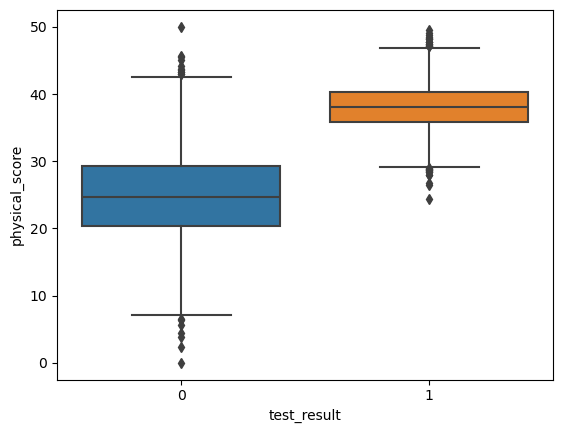

In [49]:
sns.boxplot(x='test_result',y='physical_score',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

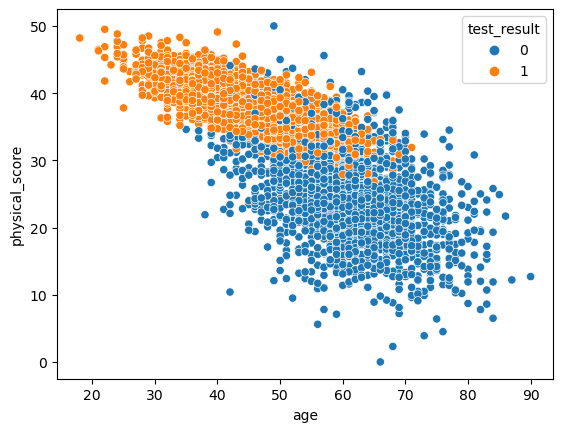

In [50]:
sns.scatterplot(x='age',y='physical_score',data=df, hue='test_result')

In [51]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shrey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


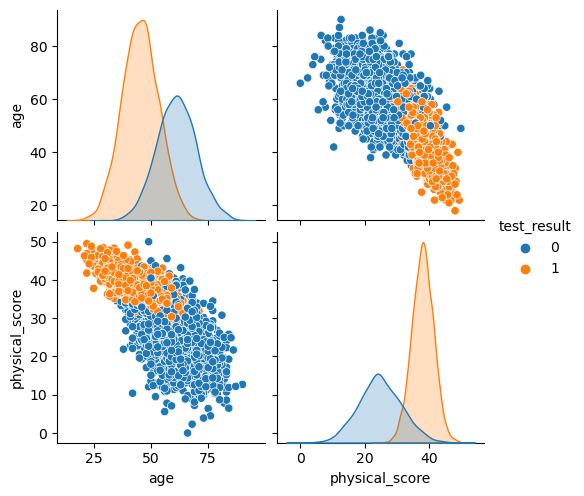

In [52]:
sns.pairplot(df, hue='test_result')

<Axes: xlabel='physical_score', ylabel='test_result'>

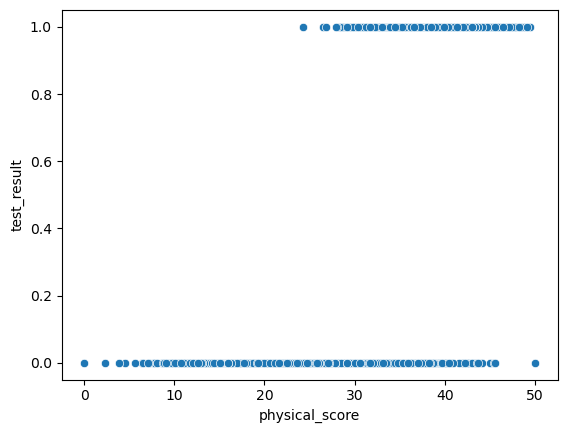

In [53]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

###### Train | Test Split 

In [54]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [55]:
X.shape

(5000, 2)

In [56]:
y.shape

(5000,)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2), (1000, 2), (4000,), (1000,))

###### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()

In [62]:
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

###### Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
#help(LogisticRegression)

In [65]:
log_model = LogisticRegression()
log_model.fit(sc_X_train,y_train)

LogisticRegression()

In [66]:
y_pred = log_model.predict(sc_X_test)

In [67]:
y_proba = log_model.predict_proba(sc_X_test)
y_proba

array([[8.22514765e-01, 1.77485235e-01],
       [1.27768584e-01, 8.72231416e-01],
       [3.81802154e-04, 9.99618198e-01],
       ...,
       [7.14847591e-02, 9.28515241e-01],
       [7.89280494e-02, 9.21071951e-01],
       [3.48382530e-02, 9.65161747e-01]])

In [68]:
log_model.coef_

array([[-0.91384609,  3.40328558]])

###### Performance Metrics

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay

In [70]:
y_pred.shape

(1000,)

In [71]:
confusion_matrix(y_pred,y_test)

array([[351,  39],
       [ 38, 572]])

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       389
           1       0.94      0.94      0.94       611

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



###### ROC curve

In [73]:
from sklearn import metrics

In [74]:
y_score  = y_proba[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)

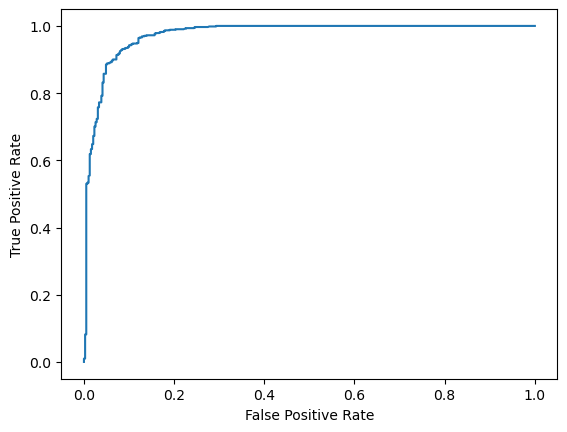

In [75]:
RocCurveDisplay(fpr = fpr, tpr = tpr).plot()